Linear Regression:

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

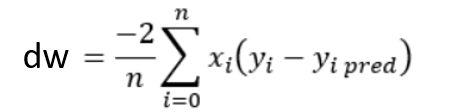

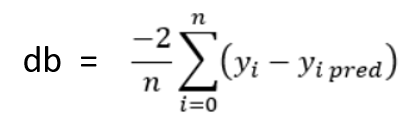

In [28]:
import numpy as np

In [29]:
class Linear_Regression():
    #initiating hyperparameters
    def __init__(self , learning_rate , no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self , X , y):
        self.m , self.n = X.shape # no of rows and columns
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y

        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        y_prediction = self.predict(self.X)

        dw = -(2*(self.X.T).dot(self.y - y_prediction))/self.m
        db = -2*np.sum(self.y - y_prediction)/self.m

        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self,X):
        return X.dot(self.w) + self.b





Using linear regression model for prediction

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [31]:
dataset = pd.read_csv('salary_data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [32]:
X  = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

In [33]:
print(X)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [34]:
dataset.shape

(30, 2)

In [35]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [36]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.33 , random_state = 2)

In [37]:
model = Linear_Regression(learning_rate=0.02 , no_of_iterations=1000)

In [38]:
model.fit(X_train , y_train)

In [39]:
print(model.w[0] , model.b)

9514.400999035135 23697.406507136307


In [40]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import r2_score
print(r2_score(y_test , y_pred))

0.904128890392985


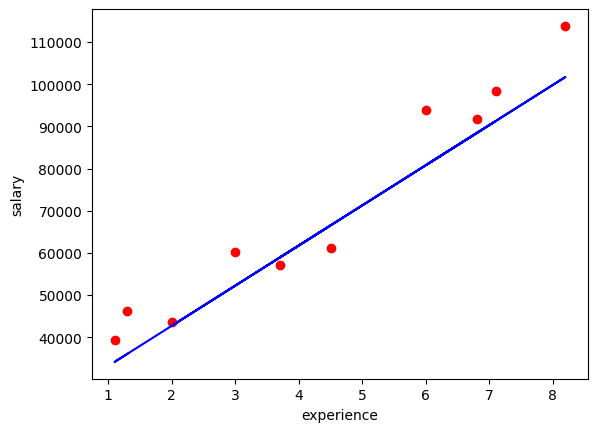

In [43]:
plt.scatter(X_test  , y_test , color = 'red')
plt.plot(X_test , y_pred , color= 'blue')
plt.xlabel('experience')
plt.ylabel('salary')
plt.show()